In [1]:
!pip install sk-video

In [0]:
import skvideo.io  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator
import random
from numba import prange
import plotly.express as px
from sklearn.cluster import KMeans
import warnings 
from scipy import stats

warnings.filterwarnings("ignore")

In [3]:
video = skvideo.io.vread("/content/videoplayback.mp4")  
print(video.shape)

(1682, 360, 640, 3)


In [4]:
#Create Background Tensor
background = video[0].copy()
background.shape

(360, 640, 3)

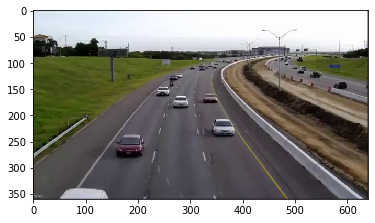

In [5]:
plt.imshow(background)
plt.show()

In [0]:
#Get random frames to speed up process
n_frames = 20
frames_idx = []
for i in range(0, n_frames):
  frames_idx.append(random.randint(0, video.shape[0]))

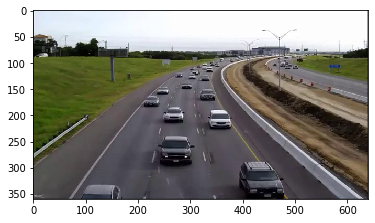

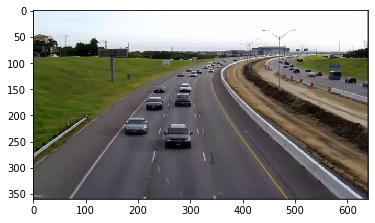

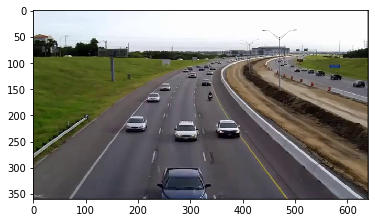

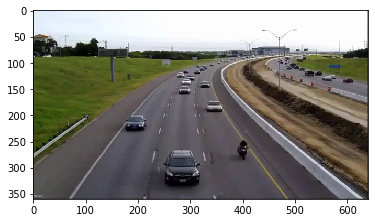

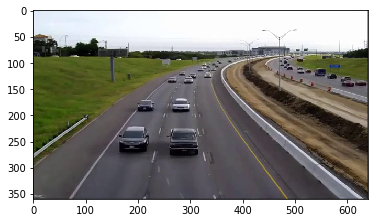

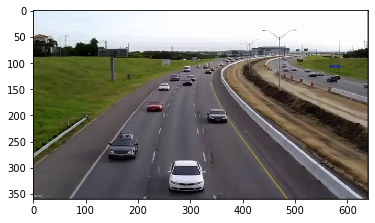

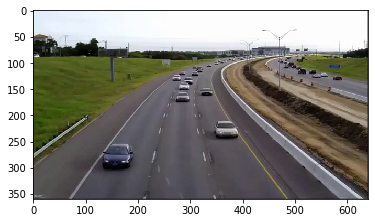

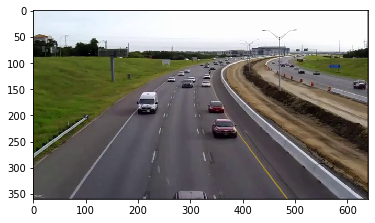

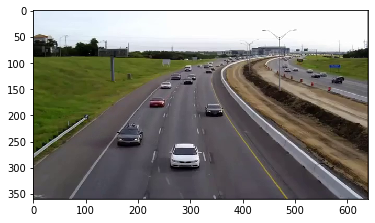

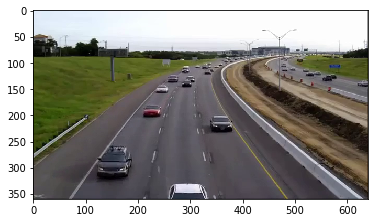

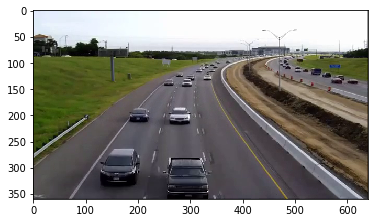

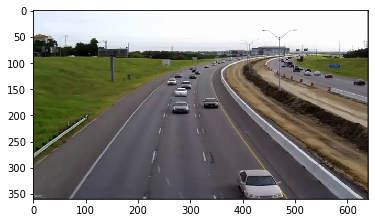

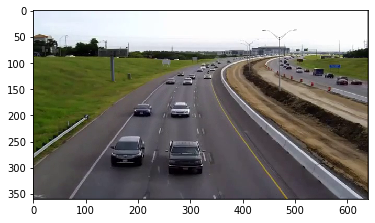

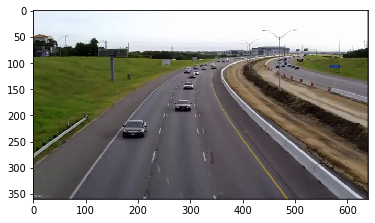

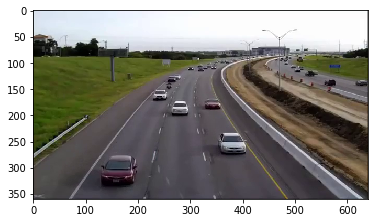

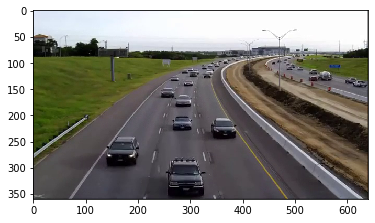

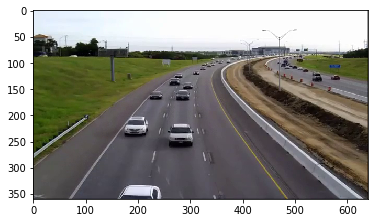

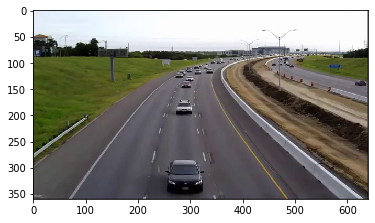

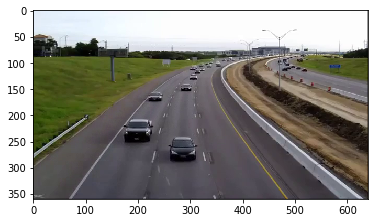

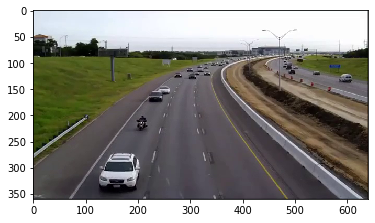

In [7]:
for frame in frames_idx:
  plt.imshow(video[frame])
  plt.show()

In [8]:
%%time
for x in prange(150, 210): #2
  for y in prange(220, 270): #1
    colors=[]
    for z in frames_idx:
      colors.append(video[z][y][x])
      colors_a = np.array(colors)
    ca = KMeans(n_clusters = 2)
    ca = ca.fit(colors)
    labels, counts = np.unique(ca.labels_, return_counts=True)
    clusters = dict(zip(labels, counts))
    most_common = max(clusters, key=clusters.get)
    #background_pixel = [int(i) for i in list(ca.cluster_centers_[most_common])]
    #background_pixel = list(stats.mode(colors_a[ca.labels_])[0][0])
    #background_pixel = list(np.median(colors_a[ca.labels_])[0])
    background_pixel = []
    background_pixel.append(np.median(colors_a[:,0]))
    background_pixel.append(np.median(colors_a[:,1]))
    background_pixel.append(np.median(colors_a[:,2]))
    background[y][x] = background_pixel

CPU times: user 55.9 s, sys: 139 ms, total: 56 s
Wall time: 55.9 s


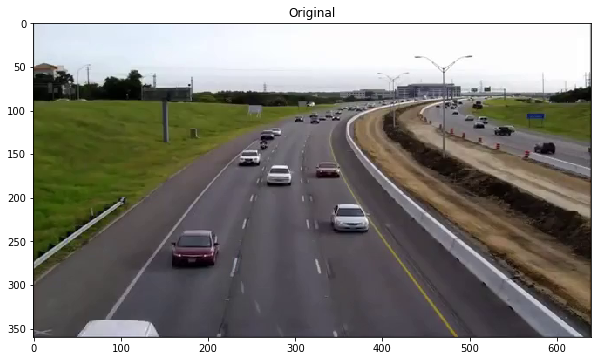

In [9]:
plt.figure(figsize=(10,10))
plt.imshow(video[0])
plt.title("Original")
plt.show()

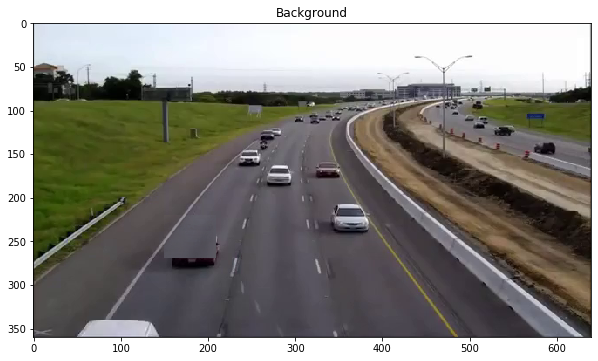

In [10]:
plt.figure(figsize=(10,10))
plt.imshow(background)
plt.title("Background")
plt.show()

In [0]:
video = video.astype("int16")
background = background.astype("int16")

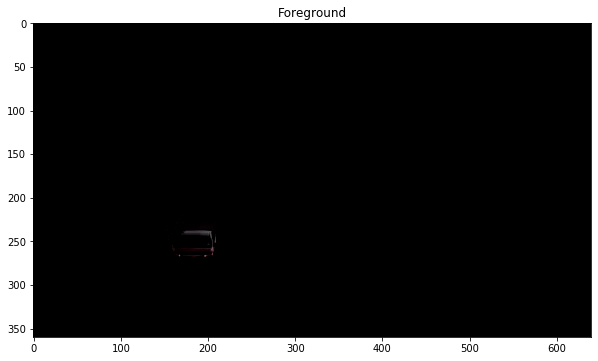

In [12]:
foreground = (video[0] - background)
np.clip(foreground, 0, 255, out=foreground)
plt.figure(figsize=(10,10))
plt.imshow(foreground)
plt.title("Foreground")
plt.show()

In [31]:
%%time
foreground = video.copy()
for i in range(0,foreground.shape[0]):
  foreground[i] = np.subtract(video[i], background)
  np.clip(foreground[i], 0, 255, out=foreground[i])
  foreground[i] = foreground[i].astype(np.uint8)

foreground = foreground.astype(np.uint8)
skvideo.io.vwrite("foreground.mp4", foreground)

CPU times: user 5.17 s, sys: 538 ms, total: 5.71 s
Wall time: 14.5 s


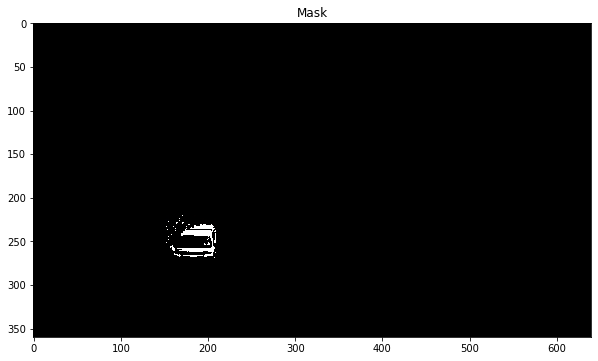

CPU times: user 2.54 s, sys: 7.11 ms, total: 2.54 s
Wall time: 2.54 s


In [30]:
%%time
mask = foreground[0].copy()
for x in prange(0, mask.shape[1]):
  for y in prange(0, mask.shape[0]):
    if np.mean(mask[y][x]) > 1:
      mask[y][x] = [255,255,255]
plt.figure(figsize=(10,10))
plt.imshow(mask)
plt.title("Mask")
plt.show()

In [36]:
%%time
mask = foreground.copy()
for i in range(0, 1):
  for x in prange(0, mask.shape[2]):
    for y in prange(0, mask.shape[1]):
      if np.mean(mask[i][y][x]) > 1:
        mask[i][y][x] = [255,255,255]
      else:
        mask[i][y][x] = [0,0,0]

CPU times: user 3.06 s, sys: 791 µs, total: 3.06 s
Wall time: 3.06 s


In [0]:
pixel = pd.DataFrame(colors, columns=["R","G","B"])
pixel["label"] = ca.labels_
fig = px.scatter_3d(pixel, x = "R", y = "G", z = "B", color="label")
fig.show()